
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [5]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, auc
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_line, geom_abline, labs, theme_minimal, scale_color_manual
from sklearn.neighbors import KNeighborsClassifier

In [3]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


KNN Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       0.33      0.22      0.27         9
           2       0.62      0.62      0.62        16
           3       1.00      1.00      1.00         4

    accuracy                           0.75        55
   macro avg       0.71      0.70      0.70        55
weighted avg       0.72      0.75      0.73        55

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.40      0.22      0.29         9
           2       0.65      0.81      0.72        16
           3       1.00      1.00      1.00         4

    accuracy                           0.82        55
   macro avg       0.76      0.76      0.75        55
weighted avg       0.80      0.82      0.80        55

KNN Classification Report
              precision    recall  f1-scor

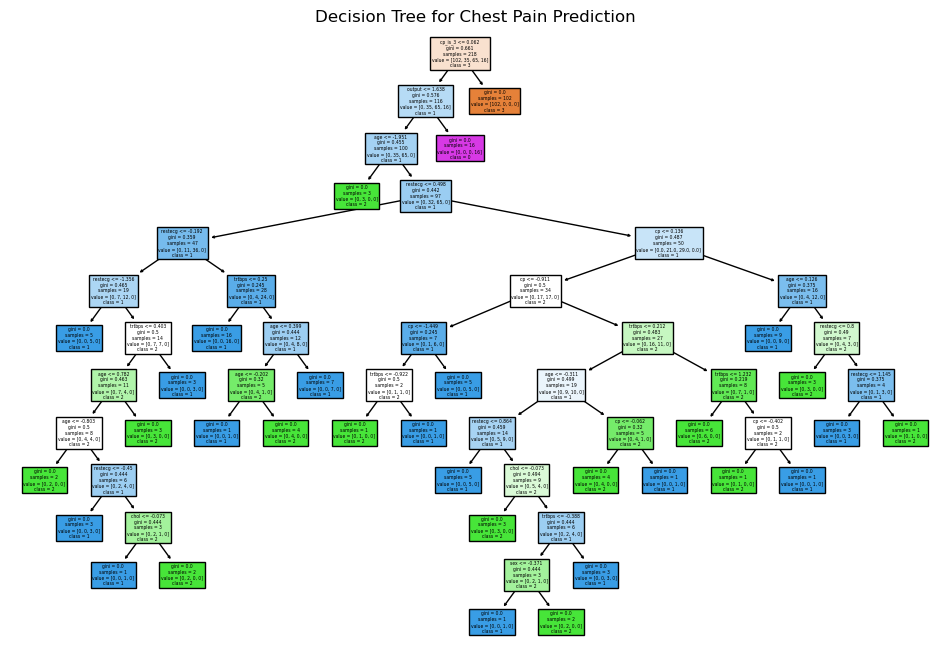

Feature importance for the Decision Tree:
age: 0.10
sex: 0.01
cp: 0.05
trtbps: 0.06
chol: 0.02
restecg: 0.08
output: 0.15
cp_is_3: 0.54
LDA Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.36      1.00      0.53         9
           2       0.00      0.00      0.00        16
           3       1.00      1.00      1.00         4

    accuracy                           0.71        55
   macro avg       0.59      0.75      0.63        55
weighted avg       0.60      0.71      0.63        55

KNN ROC AUC: 0.89
Decision Tree ROC AUC: 0.85
LDA ROC AUC: 0.83
Feature importance for the Decision Tree:
age: 0.10
sex: 0.01
cp: 0.05
trtbps: 0.06
chol: 0.02
restecg: 0.08
output: 0.15
cp_is_3: 0.54
LDA Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.36      1.00      0.53         9
           2  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, classification_report


# Assuming 'ha' is the dataset
X = ha.drop(columns=['cp'])
y = ha['cp']

# Standardizing the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

### Multiclass KNN
param_grid_knn = {'n_neighbors': range(1, 31)}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, scoring='roc_auc_ovr', cv=5, verbose=1)
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))

### Multiclass Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_tree = decision_tree.predict(X_test)

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_tree))

# Plot the fitted decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=ha.columns[:-1], class_names=[str(c) for c in y.unique()], filled=True)
plt.title("Decision Tree for Chest Pain Prediction")
plt.show()

# Interpretation of splits
print("Feature importance for the Decision Tree:")
for name, importance in zip(ha.columns[:-1], decision_tree.feature_importances_):
    if importance > 0:
        print(f"{name}: {importance:.2f}")

### Multiclass LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)

print("LDA Classification Report")
print(classification_report(y_test, y_pred_lda))

# Calculating ROC AUC for each model
y_proba_knn = best_knn.predict_proba(X_test)
y_proba_tree = decision_tree.predict_proba(X_test)
y_proba_lda = lda.predict_proba(X_test)

roc_auc_knn = roc_auc_score(y_test, y_proba_knn, multi_class='ovr')
roc_auc_tree = roc_auc_score(y_test, y_proba_tree, multi_class='ovr')
roc_auc_lda = roc_auc_score(y_test, y_proba_lda, multi_class='ovr')

print(f"KNN ROC AUC: {roc_auc_knn:.2f}")
print(f"Decision Tree ROC AUC: {roc_auc_tree:.2f}")
print(f"LDA ROC AUC: {roc_auc_lda:.2f}")




## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [22]:

# Create a function to evaluate logistic regression for each cp category
def evaluate_logistic_regression_for_cp_category(category):
    # Create binary target column
    ha[f'cp_is_{category}'] = (ha['cp'] == category).astype(int)
    
    # Define features and target
    X = ha.drop(columns=['cp', f'cp_is_{category}'])
    y = ha[f'cp_is_{category}']
    
    # Standardizing the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Logistic Regression model
    logistic_model = LogisticRegression(random_state=42)
    logistic_model.fit(X_train, y_train)
    
    # Predictions
    y_pred = logistic_model.predict(X_test)
    
    # F1 Score
    f1 = f1_score(y_test, y_pred)
    
    print(f"Category {category}:")
    print(classification_report(y_test, y_pred, target_names=["Not Category", f"Category {category}"]))
    print(f"F1 Score: {f1:.2f}\n")
    
    return f1

# Evaluate Logistic Regression for each cp category
f1_scores = {}
for cp_category in range(4):
    f1_scores[cp_category] = evaluate_logistic_regression_for_cp_category(cp_category)

# Determine the best category
best_category = max(f1_scores, key=f1_scores.get)
print(f"The OvR approach was best at distinguishing category {best_category} with an F1 Score of {f1_scores[best_category]:.2f}.")



Category 0:
              precision    recall  f1-score   support

Not Category       0.80      0.69      0.74        29
  Category 0       0.70      0.81      0.75        26

    accuracy                           0.75        55
   macro avg       0.75      0.75      0.75        55
weighted avg       0.75      0.75      0.75        55

F1 Score: 0.75

Category 1:
              precision    recall  f1-score   support

Not Category       0.85      0.89      0.87        46
  Category 1       0.29      0.22      0.25         9

    accuracy                           0.78        55
   macro avg       0.57      0.56      0.56        55
weighted avg       0.76      0.78      0.77        55

F1 Score: 0.25

Category 2:
              precision    recall  f1-score   support

Not Category       1.00      1.00      1.00        39
  Category 2       1.00      1.00      1.00        16

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weight

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

# Function to evaluate logistic regression for binary classification between two cp categories
def evaluate_logistic_regression_for_cp_pair(category1, category2):
    # Filter dataset for the two categories
    filtered_data = ha[ha['cp'].isin([category1, category2])]
    
    # Define features and target
    X = filtered_data.drop(columns=['cp'])
    y = (filtered_data['cp'] == category2).astype(int)  # Binary target: 0 for category1, 1 for category2
    
    # Standardizing the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Logistic Regression model
    logistic_model = LogisticRegression(random_state=42)
    logistic_model.fit(X_train, y_train)
    
    # Predictions and ROC-AUC
    y_proba = logistic_model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    
    print(f"Comparison {category1} vs {category2}:")
    print(f"ROC-AUC: {roc_auc:.2f}\n")
    
    return roc_auc

# Evaluate Logistic Regression for each pair
roc_auc_scores = {}
pairs = [(0, 1), (0, 2), (0, 3)]

for pair in pairs:
    roc_auc_scores[pair] = evaluate_logistic_regression_for_cp_pair(pair[0], pair[1])

# Determine the best pair
best_pair = max(roc_auc_scores, key=roc_auc_scores.get)
print(f"The OvO approach was best at distinguishing between categories {best_pair[0]} and {best_pair[1]} with a ROC-AUC of {roc_auc_scores[best_pair]:.2f}.")


Comparison 0 vs 1:
ROC-AUC: 1.00

Comparison 0 vs 2:
ROC-AUC: 1.00

Comparison 0 vs 3:
ROC-AUC: 1.00

The OvO approach was best at distinguishing between categories 0 and 1 with a ROC-AUC of 1.00.
Comparison 0 vs 1:
ROC-AUC: 1.00

Comparison 0 vs 2:
ROC-AUC: 1.00

Comparison 0 vs 3:
ROC-AUC: 1.00

The OvO approach was best at distinguishing between categories 0 and 1 with a ROC-AUC of 1.00.
